# CS229, Fall 2017
# Problem Set #1 (Unsupervised Learning)

## 1. Logistic Regression [25 points]

(a) [10 points] Consider the average empirical loss (the risk) for logistic regression:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} log(1+e^{y^{(i)} \theta^{T} x^{(i)} }) = - \frac{1}{m} \sum_{i=1}^{m} log(h_{\theta}(y^{(i)}x^{(i)}))$$

where $ y^{(i)} \in \{ -1, 1\}$, $h_{\theta}(x) = g(\theta^{T}x)$ and $g(z) = 1 /(1+e^{-z})$. Find
the hessian of this function and show that for any vector $z$, it holds true that

$$ z^{T} H z \geq 0$$

(a) [Solution]

Before we proceed we define:
* $m$ - number of training samples
* $n$ - number of features
* $x^{(i)}$ - ith training sample
* $x^{(i)}_{j}$ j-th feature of the i-th training example

Given the definition of a Hessian Matrix, we can write the Hessian Matrix of the average empirical loss $J(\theta)$ as:

$$(H_{J})_{i,j} = \frac{\partial^2 J}{\partial \theta_{i} \partial \theta_{j}}\tag{1}$$

We will start by computing the first partial derivative of $J(\theta)$ with respect to $\theta_{j}$


$$\frac{\partial J}{\partial \theta_{j}} =-\frac{1}{m} \sum_{i=1}^{m} \frac{\partial}{\partial \theta_{j}}[\log(h_{\theta}(y^{(i)}x^{(i)})]\tag{2}$$

Note that partial derivative is a linear operator, that why the partial derivative with respect to $\theta_{j}$ is passed inside
the sum in equation (2). Also it is important to note that $x^{(i)} \in \mathbb{R}^{n}$ and $y^{(i)} \in [-1,1]$, thus their
product is also an N-dimensional vector. 

Now we will substitute $h_{\theta}(x^{(i)}y^{(i)})$ with $g(\theta^{T}x^{(i)}y^{(i)})$ and thus equation (2) can be re-written
as:

$$\frac{\partial J}{\partial \theta_{j}} =-\frac{1}{m} \sum_{i=1}^{m} \frac{\partial}{\partial \theta_{j}}[\log(g(\theta^{T}y^{(i)}x^{(i)}))]\tag{3}$$

The partial derivative of $log(g(\theta^{T}x^{(i)}y^{(i)}))$ with respect to $\theta_{j}$ can be computed by using the chain
rule:

$$ \frac{\partial \log(g)}{\partial \theta_{j}} = \frac{1}{g} \frac{\partial g}{\partial \theta_{j}}\tag{4}$$ 

We will know compute the partial derivative on the LHS of equation (4):

$$\frac{\partial g}{\partial \theta_{j}} = \frac{\partial}{\partial \theta_{j}}\left[\frac{1}{1+e^{-\theta^{T} x^{(i)}y^{(i)}}}\right] $$

$$ \frac{\partial g}{\partial \theta_{j}} = \frac{0\cdot(1+e^{-\theta^{T}x^{(i)}y^{(i)}})- \frac{\partial}{\partial \theta_{j}} [1+e^{-\theta^{T}x^{(i)}y^{(i)}}]}{(1+e^{-\theta^{T}x^{(i)}y^{(i)}})^{2}} $$

$$\frac{\partial g}{\partial \theta_{j}} = y^{(i)} \frac{\partial}{\partial \theta_{j}}[\theta^{T}x^{(i)}] \frac{e^{\theta^{T}x^{(i)}y^{(i)}}}{(1+e^{\theta^{T}x^{(i)}y^{(i)}})^{2}} \tag{5}$$

Equation (5) seems a little complicated. In order to obtain a more helpful representation of equation (5), we will re-write some
of its terms.

$$ \frac{\partial}{\partial \theta_{j}}[\theta^{T} x^{(i)} ] =\frac{\partial}{\partial \theta_{j}}[\sum_{l=0}^{n}\theta_{l}x^{(i)}_{l}] =\frac{\partial}{\partial \theta_{j}}[\theta_{0}x^{(i)}_{0}+\theta_{1}x^{(i)}_1+..+\theta_{n}x^{(i)}_{n}] \tag{6}$$

In equation (6), all the derivatives will be zero when $j \neq l$. In case that $j=l$ the derivative will be simply equal to:

$$ \frac{\partial}{\partial \theta_{j}}[\theta^{T}x^{(i)}] = x^{(i)}_{j} \tag{7}$$

Also the last term in the LHS of equation (5) can be written as:

$$\frac{e^{\theta^{T}x^{(i)}y^{(i)}}}{(1+e^{\theta^{T}x^{(i)}y^{(i)}})^{2}} = g(\theta^{T}x^{(i)}y^{(i)})(1-g(\theta^{T}x^{(i)}y^{(i)})) \tag{8}$$

By substituting equations (7) and (8) into equation (5), we get

$$ \frac{\partial g}{\partial \theta_{j}} = y^{(i)} x^{(i)}_{j} g(\theta^{T}x^{(i)}y^{(i)})(1-g(\theta^{T}x^{(i)}y^{(i)})) \tag{9}$$


And by substituting equation (9) into equation (4) we simply get:
$$ \frac{\partial \log(g)}{\partial \theta_{j}} = y^{(i)} x^{(i)}_{j} (1-g(\theta^{T}x^{(i)}y^{(i)})) \tag{10} $$


Finally, by substituting equation (10) into equation (4) we find that the partial derivative of $J$ with respect to $\theta_{j}$ is
equal to:

$$ \frac{\partial J}{\partial \theta_{j}} = - \frac{1}{m} \sum_{i=1}^{m} y^{(i)} x^{(i)}_{j} (1-g(\theta^{T}x^{(i)}y^{(i)})) \tag{11}$$

We will continue by computing the second spatial derivative with respect to $\theta_{k}$. We introduce a new variable k in order to
not confuse it with $i$ used for summing across all $m$ training examples. Thus,

$$ \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{j}} = \frac{1}{m} \sum_{i=1}^{m} y^{(i)}x^{(i)}_{j} \frac{\partial g}{\partial \theta_{k}} \tag{12} $$

We had previously computed the derivative of $ \frac{\partial J}{\partial \theta_{j}}$ (equation (9)), the equation will be exactly the sum but instead of $ x_{j}^{(i)}$ we we have the k-th feature of training sample $x^{(i)}$. Thus,

$$  \frac{\partial g}{\partial \theta_{j}} = y^{(i)} x^{(i)}_{k} g(\theta^{T}x^{(i)}y^{(i)})(1-g(\theta^{T}x^{(i)}y^{(i)})) \tag{13} $$

Now, we will substitute equation (13) into equation (12)

$$ \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{j}} = \frac{1}{m} \sum_{i=1}^{m} y^{(i)}x^{(i)}_{j} y^{(i)} x^{(i)}_{k} g(\theta^{T}x^{(i)}y^{(i)})(1-g(\theta^{T}x^{(i)}y^{(i)}))$$

With simple algebric manipulation it can be re-written as:
$$  \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{j}} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)})^{2} x^{(i)}_{j} x^{(i)}_{k} g(\theta^{T}x^{(i)}y^{(i)})(1-g(\theta^{T}x^{(i)}y^{(i)})) \tag{14} $$

Now we will compute:

$$ 
  z^{T} H z = \begin{bmatrix} z_{0} & z_{1} & \cdots & z_{n}\end{bmatrix} \begin{bmatrix}\frac{\partial^2 J}{\partial \theta_{0} \partial \theta_{0}} & \cdots & \frac{\partial^2 J}{\partial \theta_{0} \partial \theta_{n-1}} \\ \vdots & \ddots & \vdots \\ \frac{\partial^2 J}{\partial \theta_{n-1} \partial \theta_{0}} & \cdots & \frac{\partial^2 J}{\partial \theta_{n-1} \partial \theta_{n-1}} \end{bmatrix} \begin{bmatrix} z_{0} \\ z_{1} \\ \vdots \\ z_{n} \end{bmatrix} \tag{15}
$$

Vector's $z^{T}$ dimenions are $(1,n)$ and the dimensions of the hessian matrix are $(n,n)$. The two inner dimensions are of the same 
size and their product will be of size $(1,n)$

$$ z^{T}H = \begin{bmatrix} \sum_{k=0}^{n-1} z_{k} \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{0}} &  \sum_{k=0}^{n-1} z_{k} \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{1}} & \cdots & \sum_{k=0}^{n-1} z_{k} \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{n-1}} \end{bmatrix} \tag{16}$$

We can substitute the RHS of equation (16) into equation(15) in order to determine $z^{T}H z$.

$$(z^{T}H) \cdot z = \begin{bmatrix} \sum_{k=0}^{n-1} z_{k} \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{0}} &  \sum_{k=0}^{n-1} z_{k} \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{1}} & \cdots & \sum_{k=0}^{n-1} z_{k} \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{n-1}} \end{bmatrix} \begin{bmatrix} z_{0} \\ z_{1} \\ \vdots \\ z_{n} \end{bmatrix}$$

Which can be equivalently written as: 

$$ 
z^{T}H z = z_{0} \sum_{k=0}^{n-1} z_{k} \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{0}} + z_{1} \sum_{k=0}^{n-1} z_{k} \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{1}} + \cdots + z_{n} \sum_{k=0}^{n-1} z_{k} \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{n}}
$$

Which can be further simplified to:

$$
z^{T}H z = \sum_{j=0}^{n-1} \sum_{k=0}^{k-1} z_{j} z_{k} \frac{\partial^2 J}{\partial \theta_{k} \partial \theta_{j}} \tag{17}
$$

We can replace the second partial derivative of the cost function $J$ with respect to $\theta_{k}$ and $\theta_{j}$ from equation (15)
into equation (17), thus

$$
z^{T}H z = \sum_{j=0}^{n-1} \sum_{k=0}^{k-1} z_{j} z_{k}  \frac{1}{m} \sum_{i=1}^{m} (y^{(i)})^{2} x^{(i)}_{j} x^{(i)}_{k} g(\theta^{T}x^{(i)}y^{(i)})(1-g(\theta^{T}x^{(i)}y^{(i)})) \tag{18}
$$

We can re-write equation (18), more coveniently:
$$
z^{T}H z =  \frac{1}{m} \sum_{i=1}^{m} (y^{(i)})^{2}\left(\sum_{k=0}^{n-1} \sum_{j=0}^{n-1} z_{j} z_{k} x^{(i)}_{j} x^{(i)}_{k}\right)  h_{\theta}(x^{(i)}y^{(i)})(1-h_{\theta}(x^{(i)}y^{(i)})) \tag{19}
$$

We have that $y^{(i)} \in {-1,1} $, thus $(y^{(i)})^2 \geq 0$.

We also have that:

$$ \sum_{k=0}^{n-1} \sum_{j=0}^{n-1} z_{j} z_{k} x^{(i)}_{j} x^{(i)}_{k}= \sum_{k=0}^{n-1} z_{k} x^{(i)}_{k} \sum_{j=0}^{n-1} z_{j} x^{(i)}_{j} = (z^{T}x)(z^{T}x) = (z^{T}x)^{2} \geq 0
$$

Finally, our hypothesis is the sigmoid function,thus we know that $h_{\theta}(x^{(i)}y^{(i)}) \in (0,1)$ and $1-h_{\theta}(x^{(i)}y^{(i)}) \in (0,1)$. Thus, we can conclude:

$$
 z^{T} H z \geq 0
$$

(b) We have provided two data files:

*  http://cs229.stanford.edu/ps/ps1/logistic_x.txt
*  http://cs229.stanford.edu/ps/ps1/logistic_y.txt

These files contain the inputs $(x^{(i)} \in \mathbb{R}^{2})$ and outputs $(y^{(i)}) \in \{-1.1\})$, respectively for a binary classification problem, with one training example per row. Implement Newton's
method for optimizing $J(\theta)$, and apply it to fit a logistic regression model to the data. Initialize
Newton's method with $\theta = \vec{0}$. What are the coefficients $\theta$ resulting from your fit?

## Importing the Required Libraries

First, we will have to import all the libraries that we will use in this problem

In [13]:
import numpy as np #Python's Numerical Library
import matplotlib.pyplot as plt # Tool for data visualization in python

## Appending 1s to each training sample

We want puy hypothesis to be:

$$h_{\theta}(x^{(i)}) = g(\theta^Tx^{(i)})$$

where 

$$ z^{(i)} = \theta^{T} x^{(i)} = \theta_{0} x^{(i)}_{0} + \theta_{1}x^{(i)}_{1}+\theta_{2}x^{(i)}_{2}$$

with $x^{(i)}_{0} = 1$ for all training examples

We would have to add a dummy feature in each one of our trainings samples in order to include the intercept term $\theta_{0}$.

## Implementing Newtons method

### Logistic Regression and its objective function

In logistic regression, we assume that (propabillity mass function):

$$ p(y^{(i)} = 1 | x^{(i)} ; \theta) = h_{\theta}(x^{(i)}) \tag{1}$$

$$ p(y^{(i)} = 0 | x^{(i)} ; \theta) = 1-h_{\theta}(x^{(i)}) \tag{2}$$

Equations (1) and (2) describe the probability that the output y equals to 1 (or -1) given a feature
vector $x$ and the hypothesis function's weights $\theta$

Equations (1) and (2) can be condensed  into a single equation.

$$ p(y^{(i)}|x^{(i)};\theta) = (h_{\theta}(x^{(i)}))^{y^{(i)}}(1-h_{\theta}(x^{(i)}))^{(1-y^{(i)})} \tag{3}$$

We want to generalise (3) across all training examples. Assuming that
the training examples $m$ where sampled independently we could write the likelihood
of the parameters as:

$$ \mathcal{L}(\theta) = \prod_{i=1}^{m} p(y^{(i)}|x^{(i)};\theta) = \prod_{i=1}^{m} (h_{\theta}(x^{(i)}))^{y^{(i)}}(1-h_{\theta}(x^{(i)}))^{(1-y^{(i)})} \tag{4}$$

A propabillity is a number within $[0,1]$. As a cosquence the product of the 
propabillities of all $m$ training examples will be of magnitude $10^{-m}$. 
Our objective function also penalizes our model by generating small values.
The precision provided by numpy may not be sufficient and as result it would
round up all small numbers to zero.

Instead of maximizing the likelihood function we will attempt to maximize the log 
likelihood function:

$$ \mathcal{l}(\theta) = \sum_{i=1}^{m} y^{(i)}\log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)})) \tag{5}$$

In addition, the log-likelihood function is strictly concave, which means that it exhibits one global optima.

### Newton's method

We want to maximize $\mathcal{l}(\theta)$. Since our problem will have one global optima, this is similar to
finding $\theta$ such that $\mathcal{l}'(\theta) = 0$

We can do this by using Netwon's method to search for the optimum value of $\theta$.

$$ \theta \leftarrow \theta - H^{-1} \nabla_{\theta} \mathcal{l}(\theta)$$

where $H$ is the hessian matrix of $\mathcal{l}(\theta)$ and $\nabla_{\theta} \mathcal{l}(\theta)$ are the first order partial derivatives of $\mathcal{l}(\theta)$.

$$ \nabla_{\theta} \mathcal{l}(\theta) = \begin{bmatrix} \sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)})) \\ \sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)})) x^{(i)}_{1} \\ \sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{(i)})) x^{(i)}_{2}\end{bmatrix}$$

$$ H_{k,j} = \sum_{i=1}^{m} h_{\theta}(x^{(i)})(1-h_{\theta}(x^{(i)})) x^{(i)}_{j} x^{(i)}_{k} $$

The estimation of $\theta$ is perfomed iteratevely until $\theta_{n+1} - \theta_{n} \approx 0$

### What we have to implement?

In order to implement newtons method on logistic regression we have to:

** Declare our hypothesis function
** Declare our objective function 
** Implement the update rule
** Implement the Newtons method

In [14]:
# Hypothesis function 

# Input : m-training samples 
# Output: a single value for each training example 

def h(x,th):
    #Array to store the linear part of the logistic regression
    z = np.zeros(x.shape[0])
    
    #Calculate row-wise the dot product between x and hypothesis parameters theta
    for i in range(x.shape[0]):
        z[i] = np.dot(th,x[i,:])  
    return 1/(1+np.exp(-z))

In [15]:
# Objective function

# Input: An array x of m training examples, 
#        an array with the class of each training examples, 
#        the hypothesis parameters theta
# Output: the log_likehood of the model

def log_likelihood(x,y,th):
    sigmoid_probs = h(x,th)
    l_th = np.sum(y*np.log(sigmoid_probs) + (1-y)*np.log(1-sigmoid_probs))
    return l_th

In [16]:
# Gradient of the objective function

# Input: 
#       an array x of m training samples
#       an array y with the class of each training example
#       the hypothesis parameters theta
# Output:
#       a vector with dimensions (1,n)
#
def sigmoid(x):
    return 1 / (1+np.exp(-x))
                
def gradient(x,y,th):
    
    z = y*x.dot(th)
    grad = -np.mean((1-sigmoid(z)) * y * x.T,axis = 1)
    
    return grad

In [17]:
## Hessian of the objective function

def Hessian(x,y,th):
    H = np.zeros((th.shape[0],th.shape[0]))
    sigmoid_probs = h(x,th)
    constant = sigmoid_probs*(1-sigmoid_probs) 
    for j in range(th.shape[0]):
        for k in range(th.shape[0]):
            H[j,k] = 1/x.shape[0] * np.sum(constant*x[:,j]*x[:,k])
    return H

In [18]:
# Initialize hypothesis parameters 
theta = np.array([0, 0, 0])

## Reading Data from txt values

In order to read numerical data from txt we will use numpy's built in function loadtxt.



In [19]:
#Load the class of each training sample
y_train = np.loadtxt('logistic_y.txt',dtype=np.float128)
#Load the features of each training sample
x_train = np.loadtxt('logistic_x.txt',dtype=np.float128)

In [20]:
#Add dummy feature x0 = 1 in all training examples
x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))

### Implementing Newtons Method

In [21]:
def newtons_method(x,y,th,eps,max_iterations):
    i = 0
    delta = 1
    while delta > eps and i < max_iterations:
        #Count the number of iterations
        i = i + 1
        print('Iteration {}: '.format(i))

        #Copy the old vector theta in order to compute the norm later
        th_old = th.copy()
    
        #Compute the gradient of the new theta parameters
        g = gradient(x,y,th)
    
        #Compute the Hessian Matrix
        Hess = Hessian(x,y,th)
    
        # Compute the step of each theta parameter
        dTheta = np.linalg.inv(Hess) @ g.T
    
        #Update theta 
        th = th - dTheta

        #Measure log_likelihood of the corresponding step
        l_theta = log_likelihood(x,y,th)
        print('\n Log-likelihood : {}'.format(l_theta))
        
        #Update error margin
        delta = np.linalg.norm(th-th_old,ord=1)
        print('\n Delta theta: {} \n'.format(delta))
              
    print('Finished after {} iterations ... '.format(i))
    
    return th


In [22]:
optimal_theta = newtons_method(x_train,y_train,theta,1e-6,15)

Iteration 1: 

 Log-likelihood : 19.542182007465907

 Delta theta: 2.5665525946331633 

Iteration 2: 

 Log-likelihood : 52.80734247039785

 Delta theta: 1.2549681544168962 

Iteration 3: 

 Log-likelihood : 68.46543973480902

 Delta theta: 0.6091027805858465 

Iteration 4: 

 Log-likelihood : 71.57547135186671

 Delta theta: 0.1183914843120088 

Iteration 5: 

 Log-likelihood : 71.67890144004281

 Delta theta: 0.003810971036133792 

Iteration 6: 

 Log-likelihood : 71.67901021196899

 Delta theta: 3.889656823032408e-06 

Iteration 7: 

 Log-likelihood : 71.67901021208785

 Delta theta: 4.1466687397163915e-12 

Finished after 7 iterations ... 


(c)[5 points] Plot the training data (your axes should be x1 and x2 , corresponding to the two
coordinates of the inputs, and you should use a different symbol for each point plotted to
indicate whether that example had label 1 or -1). Also plot on the same figure the decision
boundary fit by logistic regression. (This should be a straight line showing the boundary
separating the region where $h_{\theta}(x) > 0.5 $ from where $h_{\theta}(x) < 0.5$) 

The decision boundary can be found be setting the linear part to be zero:

$$ z = 0 \Rightarrow \theta^{T}x = 0 \Rightarrow \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2} = 0 $$

Thus,

$$ x_{2} = - \frac{\theta_{1}}{\theta_{2}}x_{1} - \frac{\theta_{0}}{\theta_{2}}$$ 


### Preparing our data

In [23]:
# Get the indexes of the elements of each class

#Returns the indexes of the samples whose class corresponds to -1
idx_0 = np.where(y_train == -1)

#Return the indexes of the samples whose class corresponds to 1
idx_1 = np.where(y_train ==  1)

#Coefficients of decision boundary equation
coefficients = - optimal_theta[:2]/optimal_theta[2]

#Get the minimum and maximum values of x1 and x2

#We access the row to find the maximum and minimum value of x1
#across all training examples
x1_min = x_train[:,1].min()
x1_max = x_train[:,1].max()

#Now that we have the margins for the space of x1 that
#we are interested we will sample 100 points for the line
x1 = np.linspace(x1_min,x1_max,100)

# the decision bountary
desicion_boundary = coefficients[1]*x1+coefficients[0]

### Plot data with decision boundary

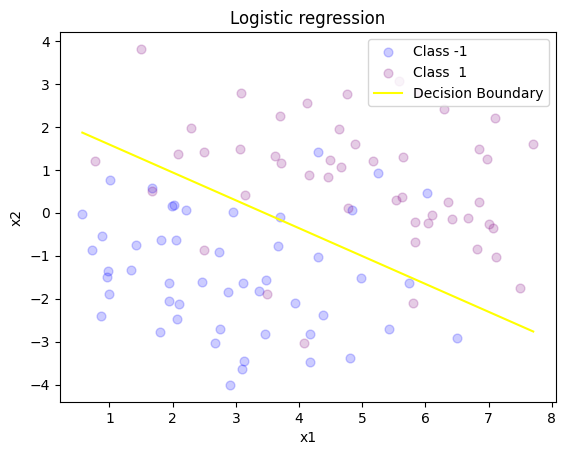

In [24]:
#Scatter plot
plt.scatter(x_train[idx_0,1],x_train[idx_0,2],c='blue',marker = 'o',s=40,alpha=0.2,label='Class -1')
plt.scatter(x_train[idx_1,1],x_train[idx_1,2],c='purple',marker = 'o', s=40,alpha=0.2,label='Class  1')
plt.plot(x1,desicion_boundary,c='yellow',label='Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic regression')
plt.legend()
plt.show()
